In [47]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from datasets import load_dataset
import matplotlib.pyplot as plt
import random
import seaborn as sns
from collections import Counter
import math
from torch.utils.data import Dataset,DataLoader
import cv2
import numpy as np
from PIL import Image
from sklearn.preprocessing import StandardScaler
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import timeit
from prettytable import PrettyTable

In [49]:
ds = load_dataset("fcakyon/pokemon-classification", name="full")
print(ds)
print(type(ds['train'][0]['image']))


  0%|          | 0/3 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 4869
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1390
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 732
    })
})
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [50]:
label_map = ['Golbat', 'Machoke', 'Omastar', 'Diglett', 'Lapras', 'Kabuto', 'Persian', 'Weepinbell', 'Golem', 'Dodrio','Raichu', 'Zapdos',
             'Raticate', 'Magnemite', 'Ivysaur', 'Growlithe', 'Tangela', 'Drowzee', 'Rapidash', 'Venonat', 'Pidgeot', 'Nidorino', 'Porygon',
             'Lickitung', 'Rattata', 'Machop', 'Charmeleon', 'Slowbro', 'Parasect', 'Eevee', 'Starmie', 'Staryu', 'Psyduck', 'Dragonair', 'Magikarp',
             'Vileplume', 'Marowak', 'Pidgeotto', 'Shellder', 'Mewtwo', 'Farfetchd', 'Kingler', 'Seel', 'Kakuna', 'Doduo', 'Electabuzz', 'Charmander',
             'Rhyhorn', 'Tauros', 'Dugtrio', 'Poliwrath', 'Gengar', 'Exeggutor', 'Dewgong', 'Jigglypuff', 'Geodude', 'Kadabra', 'Nidorina', 'Sandshrew',
             'Grimer', 'MrMime', 'Pidgey', 'Koffing', 'Ekans', 'Alolan Sandslash', 'Venusaur', 'Snorlax', 'Paras', 'Jynx', 'Chansey', 'Hitmonchan',
             'Gastly', 'Kangaskhan', 'Oddish', 'Wigglytuff', 'Graveler', 'Arcanine', 'Clefairy', 'Articuno', 'Poliwag', 'Abra', 'Squirtle', 'Voltorb',
             'Ponyta', 'Moltres', 'Nidoqueen', 'Magmar', 'Onix', 'Vulpix', 'Butterfree', 'Krabby', 'Arbok', 'Clefable', 'Goldeen', 'Magneton', 'Dratini',
             'Caterpie', 'Jolteon','Nidoking', 'Alakazam', 'Dragonite', 'Fearow', 'Slowpoke', 'Weezing', 'Beedrill', 'Weedle', 'Cloyster', 'Vaporeon',
             'Gyarados', 'Golduck','Machamp', 'Hitmonlee', 'Primeape', 'Cubone', 'Sandslash', 'Scyther', 'Haunter', 'Metapod', 'Tentacruel', 'Aerodactyl',
             'Kabutops', 'Ninetales','Zubat', 'Rhydon', 'Mew', 'Pinsir', 'Ditto', 'Victreebel', 'Omanyte', 'Horsea', 'Pikachu', 'Blastoise', 'Venomoth', 'Charizard',
             'Seadra', 'Muk', 'Spearow', 'Bulbasaur', 'Bellsprout', 'Electrode', 'Gloom', 'Poliwhirl', 'Flareon', 'Seaking', 'Hypno', 'Wartortle', 'Mankey', 'Tentacool','Exeggcute', 'Meowth']

In [51]:
print(f"dataset has {len(label_map)} unique pokemon")
train_count = ds['train'].num_rows
test_count = ds['test'].num_rows
validation_count = ds['validation'].num_rows
print(f"dataset has {train_count} training image")
print(f"dataset has {test_count} test image")
print(f"dataset has {validation_count} validation image")
print(f"dataset has {train_count + test_count + validation_count} total image")

dataset has 150 unique pokemon
dataset has 4869 training image
dataset has 732 test image
dataset has 1390 validation image
dataset has 6991 total image


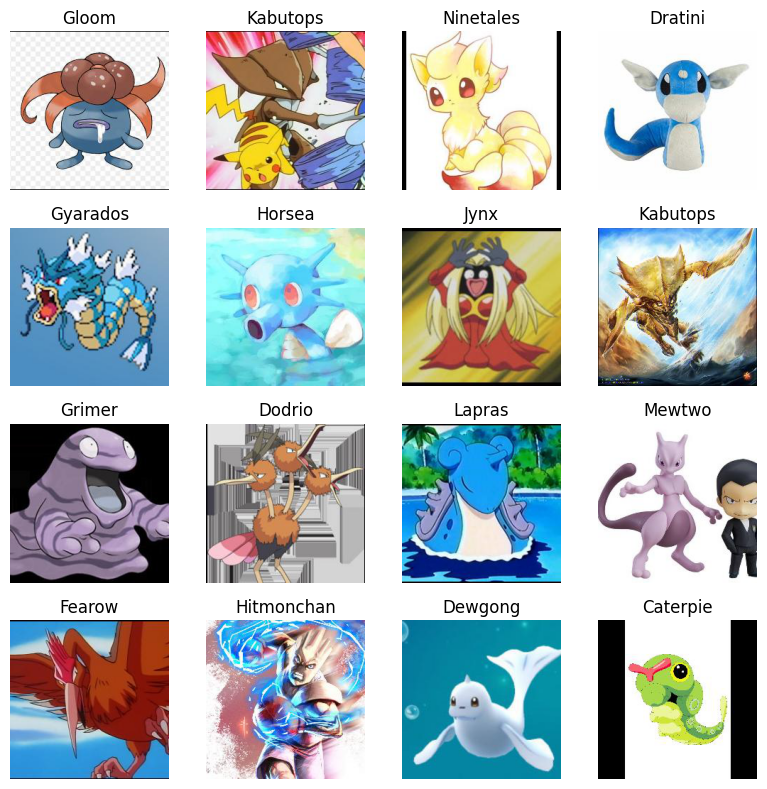

In [52]:
num_images = 16

figure = plt.figure(figsize=(8, 8))
cols, rows = 4, 4

random_indices = random.sample(range(len(ds['train'])), num_images)

for i, idx in enumerate(random_indices):
    img = ds['train'][idx]['image']
    label = ds['train'][idx]['labels']

    figure.add_subplot(rows, cols, i+1)
    plt.title(label_map[label])
    plt.axis("off")
    plt.imshow(img)

plt.tight_layout()
plt.show()

In [53]:
label_counts = Counter()

labels = [data['labels'] for subset in ds.values() for data in subset]
label_counts.update(labels)
total = 0
min = 100
max_label = 0
max = -1
min_label = 0
for label, count in label_counts.items():
    print(f"label -> {label_map[label]}, image count -> {count}")
    if count > max:
      max = count
      max_label = label

    if count < min:
      min = count
      min_label = label

    total = total + count
print(f"on average each label has -> {math.floor(total/len(label_map))} image")
print(f"min img a a label has -> {min} image. label name -> {label_map[min_label]}")
print(f"max img a a label has -> {max} image. label name -> {label_map[max_label]}")

label -> Abra, image count -> 35
label -> Aerodactyl, image count -> 35
label -> Alakazam, image count -> 64
label -> Alolan Sandslash, image count -> 41
label -> Arbok, image count -> 41
label -> Arcanine, image count -> 41
label -> Articuno, image count -> 45
label -> Beedrill, image count -> 46
label -> Bellsprout, image count -> 40
label -> Blastoise, image count -> 42
label -> Bulbasaur, image count -> 41
label -> Butterfree, image count -> 40
label -> Caterpie, image count -> 37
label -> Chansey, image count -> 43
label -> Charizard, image count -> 47
label -> Charmander, image count -> 51
label -> Charmeleon, image count -> 46
label -> Clefable, image count -> 38
label -> Clefairy, image count -> 46
label -> Cloyster, image count -> 48
label -> Cubone, image count -> 40
label -> Dewgong, image count -> 43
label -> Diglett, image count -> 39
label -> Ditto, image count -> 40
label -> Dodrio, image count -> 39
label -> Doduo, image count -> 35
label -> Dragonair, image count -> 42

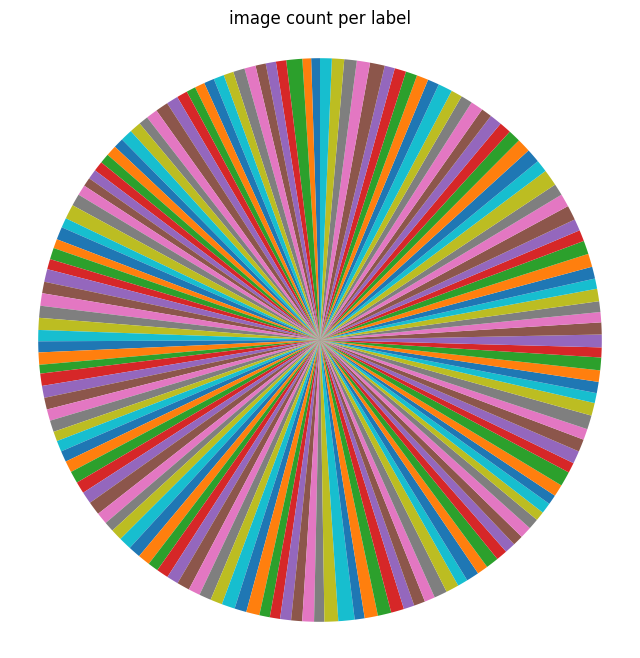

In [54]:
plt.figure(figsize=(8, 8))
plt.pie(list(label_counts.values()), startangle=90)
plt.axis('equal')

plt.title('image count per label')
plt.show()

In [55]:
class pokemon_dataset(Dataset):
    def __init__(self, imgs, labels,transform=None):
        self.imgs = imgs
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        feature = self.imgs[idx]
        label = self.labels[idx]
        if self.transform is not None:
          feature = self.transform(feature)
        return feature, label

In [56]:
train_features = ds['train']['image']
train_labels = ds['train']['labels']

val_features = ds['validation']['image']
val_labels = ds['validation']['labels']

test_features = ds['test']['image']
test_labels = ds['test']['labels']

In [57]:
train_dataset = pokemon_dataset(train_features, train_labels)

img size: (224, 224)
mean of img: 214.79585857780611
dtype of img: <class 'PIL.JpegImagePlugin.JpegImageFile'>
min pixel value of img: 0
max pixel value of img: 255


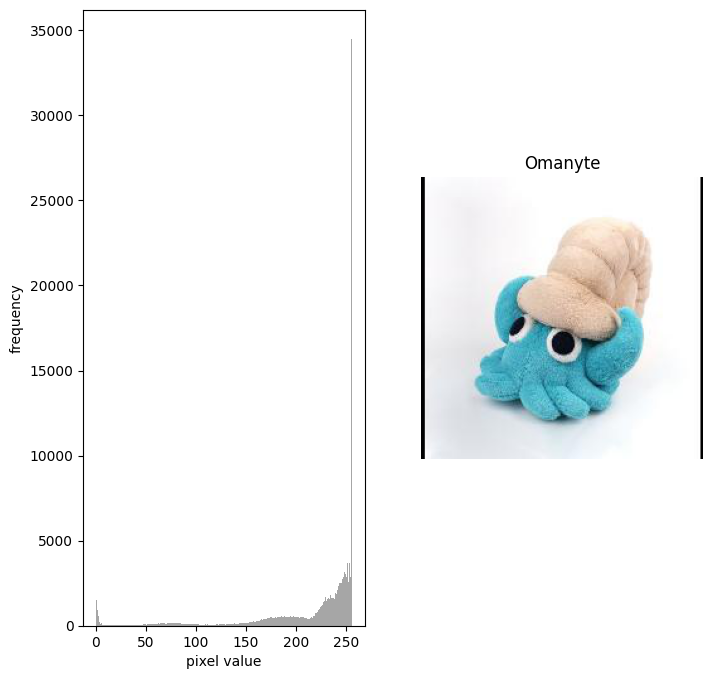

In [58]:
random_idx = random.randint(0,len(train_dataset))
img,label = train_dataset[random_idx]
print(f'img size: {img.size}')
print(f'mean of img: {np.asarray(img).mean()}')
print(f'dtype of img: {type(img)}')
print(f'min pixel value of img: {np.asarray(img).min()}')
print(f'max pixel value of img: {np.asarray(img).max()}')

figure = plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.hist(np.asarray(img).flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title(label_map[label])
plt.imshow(img)
plt.show()

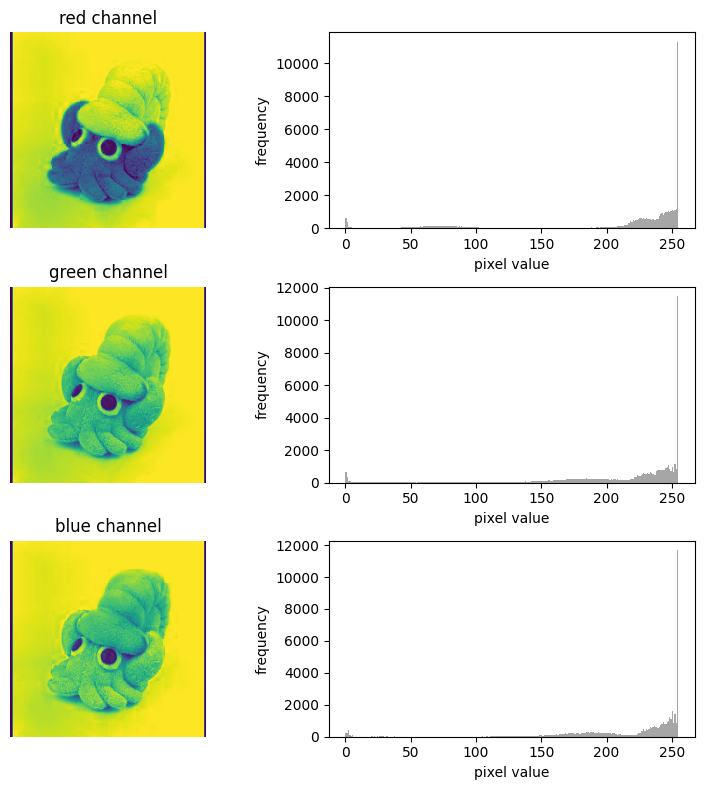

In [59]:
imgarray = np.array(img)
red_channel = imgarray[:, :, 0]
green_channel = imgarray[:, :, 1]
blue_channel = imgarray[:, :, 2]

figure = plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.imshow(red_channel)
plt.axis("off")
plt.title("red channel")
plt.subplot(3,2,2)
plt.hist(np.asarray(red_channel).flatten(), bins=256, color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')

plt.subplot(3, 2, 3)
plt.imshow(green_channel)
plt.axis("off")
plt.title("green channel")
plt.subplot(3,2,4)
plt.hist(np.asarray(green_channel).flatten(), bins=256, color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')

plt.subplot(3,2,5)
plt.imshow(blue_channel)
plt.axis("off")
plt.title("blue channel")
plt.subplot(3,2,6)
plt.hist(np.asarray(blue_channel).flatten(), bins=256, color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

In [60]:
class normalize_img_transform(object):
    def __call__(self, img):
        img_array = np.array(img)
        img_normalized = (img_array - np.min(img_array)) / (np.max(img_array) - np.min(img_array))
        return torch.from_numpy(img_normalized)

img size: torch.Size([224, 224, 3])
mean of img: 0.7249751137434141
dtype of img: <class 'torch.Tensor'>
min pixel value of img: 0.0
max pixel value of img: 1.0


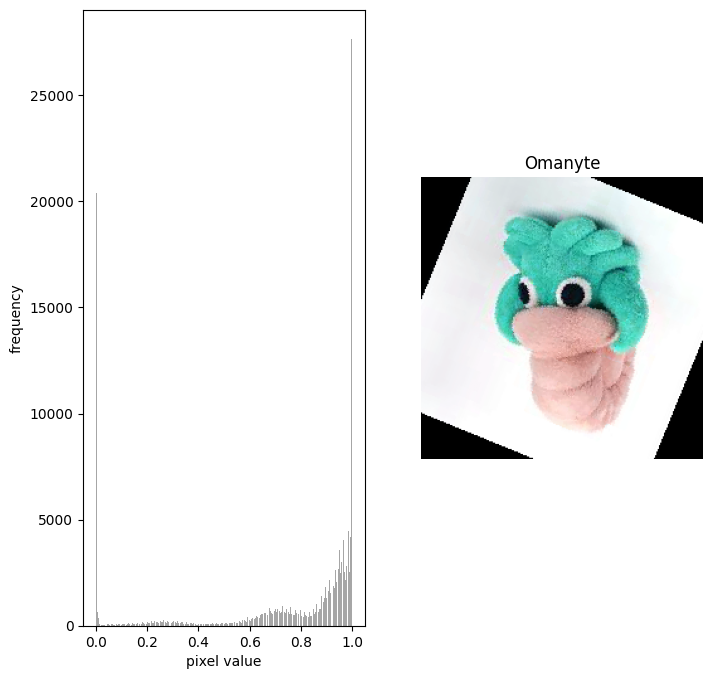

In [61]:
transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(30),
        transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),
        normalize_img_transform()])

train_dataset = pokemon_dataset(imgs = train_features, labels = train_labels, transform = transform)
img,label = train_dataset[random_idx]

print(f'img size: {img.size()}')
print(f'mean of img: {np.asarray(img).mean()}')
print(f'dtype of img: {type(img)}')
print(f'min pixel value of img: {np.asarray(img).min()}')
print(f'max pixel value of img: {np.asarray(img).max()}')

figure = plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.hist(np.asarray(img).flatten(), bins=256, range=(0, 1), color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')
plt.subplot(1, 2, 2)
plt.axis("off")
plt.title(label_map[label])
plt.imshow(img)
plt.show()

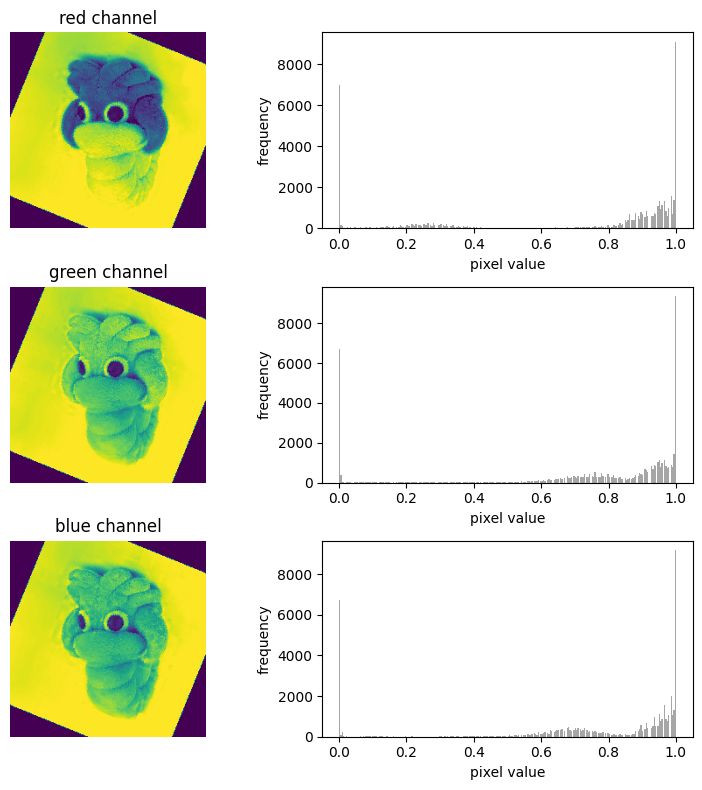

In [62]:
imgarray = np.array(img)
red_channel = imgarray[:, :, 0]
green_channel = imgarray[:, :, 1]
blue_channel = imgarray[:, :, 2]

figure = plt.figure(figsize=(8, 8))
plt.subplot(3, 2, 1)
plt.imshow(red_channel)
plt.axis("off")
plt.title("red channel")
plt.subplot(3,2,2)
plt.hist(np.asarray(red_channel).flatten(), bins=256, color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')

plt.subplot(3, 2, 3)
plt.imshow(green_channel)
plt.axis("off")
plt.title("green channel")
plt.subplot(3,2,4)
plt.hist(np.asarray(green_channel).flatten(), bins=256, color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')

plt.subplot(3,2,5)
plt.imshow(blue_channel)
plt.axis("off")
plt.title("blue channel")
plt.subplot(3,2,6)
plt.hist(np.asarray(blue_channel).flatten(), bins=256, color='gray', alpha=0.7)
plt.xlabel('pixel value')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()

In [63]:
train_dataset = pokemon_dataset(train_features, train_labels,transform = transform)
val_dataset = pokemon_dataset(val_features, val_labels, transform = transforms.ToTensor())
test_dataset = pokemon_dataset(test_features, test_labels, transform = transforms.ToTensor())

In [76]:
batch_size = 8
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True,drop_last=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False,drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False,drop_last=False)
print(f'train dataloader batch count -> {len(train_dataloader)} | train batch size -> {train_dataloader.batch_size} | dropped -> {len(train_dataset) - (train_dataloader.batch_size * len(train_dataloader))} image')
print(f'test dataloader batch count -> {len(test_dataloader)} | test batch size -> {test_dataloader.batch_size}')
print(f'val dataloader batch count -> {len(val_dataloader)} |   val batch size -> {val_dataloader.batch_size}')

train dataloader batch count -> 608 | train batch size -> 8 | dropped -> 5 image
test dataloader batch count -> 92 | test batch size -> 8
val dataloader batch count -> 174 |   val batch size -> 8


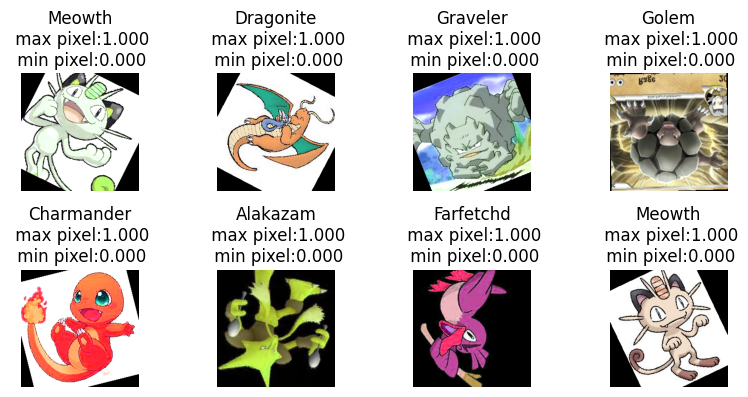

In [86]:
features, labels = next(iter(train_dataloader))

figure = plt.figure(figsize=(8, 8))

cols, rows = 4, 4

for i in range(len(features)):
    img = features[i]
    label = labels[i]

    plt.subplot(rows, cols, i+1)
    plt.imshow(img, vmin=0, vmax=1)
    plt.title(f'{label_map[label]}\n max pixel:{img.max():.3f}\n min pixel:{img.min():.3f}')
    plt.axis("off")

plt.tight_layout()
plt.show()

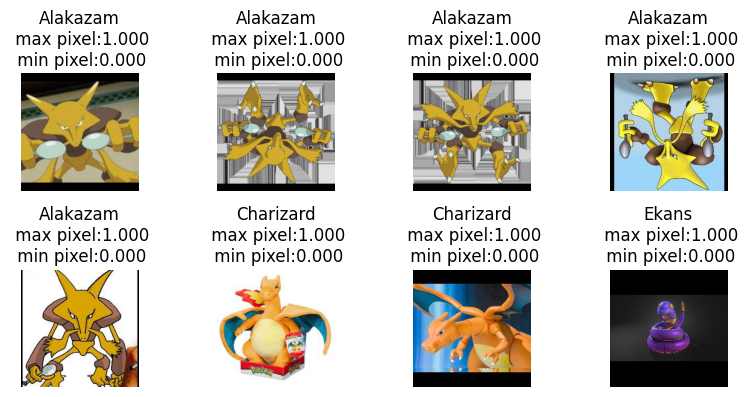

In [83]:
features, labels = next(iter(test_dataloader))

figure = plt.figure(figsize=(8, 8))

cols, rows = 4, 4

for i in range(len(features)):
    img = features[i]
    label = labels[i]

    plt.subplot(rows, cols, i+1)
    plt.imshow(img.permute(1,2,0), vmin=0, vmax=1)
    plt.title(f'{label_map[label]}\n max pixel:{img.max():.3f}\n min pixel:{img.min():.3f}')
    plt.axis("off")

plt.tight_layout()
plt.show()

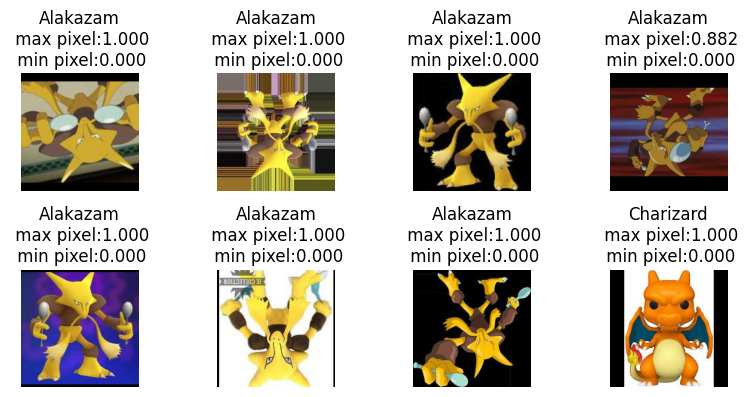

In [85]:
features, labels = next(iter(val_dataloader))

figure = plt.figure(figsize=(8, 8))

cols, rows = 4, 4

for i in range(len(features)):
    img = features[i]
    label = labels[i]

    plt.subplot(rows, cols, i+1)
    plt.imshow(img.permute(1,2,0), vmin=0, vmax=1)
    plt.title(f'{label_map[label]}\n max pixel:{img.max():.3f}\n min pixel:{img.min():.3f}')
    plt.axis("off")

plt.tight_layout()
plt.show()

In [67]:
import torch
import torch.nn as nn

class pokenet(nn.Module):
    def __init__(self):
        super().__init__()

        self.leaky_relu = nn.LeakyReLU()
        self.convdropout = nn.Dropout(p=0.25)
        self.fcdropout = nn.Dropout(p=0.5)

        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, stride=1, padding=0)
        self.batchnorm1 = nn.BatchNorm2d(num_features=64)
        ## (224 + 2*0 -3)/1 +1 = 222/2 = 111

        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=0)
        self.batchnorm2 = nn.BatchNorm2d(num_features=128)
        ## (111 + 2*0 -3)/1 +1 = 109/2 = 54

        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=0)
        self.batchnorm3 = nn.BatchNorm2d(num_features=256)
        ## (54 + 2*0 -3)/1 +1 = 52/2 = 26

        self.fc1 = nn.Linear(in_features=26*26*256, out_features=512)
        self.fc2 = nn.Linear(in_features=512, out_features=256)
        self.fc3 = nn.Linear(in_features=256, out_features=150)

    def forward(self, x):
        # [16, 224, 3, 224]
        x = self.conv1(x.float())
        x = self.batchnorm1(x)
        x = self.leaky_relu(x)
        x = self.convdropout(x)
        x = nn.functional.max_pool2d(x, kernel_size=2)

        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.leaky_relu(x)
        x = self.convdropout(x)
        x = nn.functional.max_pool2d(x, kernel_size=2)

        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.leaky_relu(x)
        x = self.convdropout(x)
        x = nn.functional.max_pool2d(x, kernel_size=2)

        nUnits = x.shape.numel() // x.shape[0]
        x = x.view(-1, int(nUnits))

        x = self.fc1(x.float())
        x = self.leaky_relu(x)
        x = self.fcdropout(x)

        x = self.fc2(x)
        x = self.leaky_relu(x)
        x = self.fcdropout(x)

        x = self.fc3(x)
        x = self.leaky_relu(x)
        x = self.fcdropout(x)

        return x


In [68]:
model = pokenet()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [69]:
table = PrettyTable(['Modules', 'Parameters'])
total_params = 0

for name, parameter in model.named_parameters():
    if not parameter.requires_grad:
        continue
    params = parameter.numel()
    table.add_row([name, params])
    total_params += params

print(table)
print(f'Total Trainable Params: {total_params}')

+-------------------+------------+
|      Modules      | Parameters |
+-------------------+------------+
|    conv1.weight   |    1728    |
|     conv1.bias    |     64     |
| batchnorm1.weight |     64     |
|  batchnorm1.bias  |     64     |
|    conv2.weight   |   73728    |
|     conv2.bias    |    128     |
| batchnorm2.weight |    128     |
|  batchnorm2.bias  |    128     |
|    conv3.weight   |   294912   |
|     conv3.bias    |    256     |
| batchnorm3.weight |    256     |
|  batchnorm3.bias  |    256     |
|     fc1.weight    |  88604672  |
|      fc1.bias     |    512     |
|     fc2.weight    |   131072   |
|      fc2.bias     |    256     |
|     fc3.weight    |   38400    |
|      fc3.bias     |    150     |
+-------------------+------------+
Total Trainable Params: 89146774


In [70]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
if device == 'cuda':
  print(f"device -> {torch.cuda.device(0)}")
  print(f"device name -> {torch.cuda.get_device_name(0)}")

device -> <torch.cuda.device object at 0x7f3fbb036590>
device name -> Tesla T4


In [72]:
def train_one_epoch(model,train_dataloader,loss_fn,optimizer,device):

    model.to(device)
    model.train()
    train_acc = 0
    train_loss=0    
    for imgs,labels in train_dataloader:
        imgs = imgs.transpose(1, 3)
        imgs,labels = imgs.to(device),labels.to(device)
        optimizer.zero_grad()
        outputs = model(imgs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(labels)
        train_acc += (outputs.argmax(dim=1) == labels).sum().item()

    total_samples = len(train_dataloader.dataset)
    train_loss /= total_samples
    train_acc = (train_acc / total_samples) * 100
    return train_loss,train_acc

In [73]:
def test_one_epoch(model,test_dataloader,loss_fn,device):
    model.to(device)
    model.eval()
    test_loss = 0
    test_acc = 0
    with torch.no_grad():
        for imgs,labels in test_dataloader:
            imgs,labels = imgs.to(device),labels.to(device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            test_loss += loss.item() * len(labels)
            test_acc += (outputs.argmax(dim=1) == labels).sum().item()

        total_samples = len(test_dataloader.dataset)
        test_loss /= total_samples
        test_acc = (test_acc / total_samples) * 100

        return test_loss,test_acc

In [79]:
def test_and_train(model,train_dataloader,test_dataloader,loss_fn,optimizer,device,epochs):

    test_train_start = timeit.default_timer()
    print("TRAINIG AND TESTING STARTED")
    weights_history = []
    total_train_loss=[]
    total_train_accuracy=[]
    train_time=[]
    
    total_test_loss=[]
    total_test_accuracy=[]
    test_time=[]
    min_loss = 99999

    for i in range(epochs):
        ### TRAINING PART ###
        start = timeit.default_timer()
        weights_history.append(model.state_dict())
        train_loss,train_acc = train_one_epoch(model=model,
                                               train_dataloader=train_dataloader,
                                               loss_fn=loss_fn,
                                               optimizer=optimizer,
                                               device=device)
        total_train_loss.append(train_loss)
        total_train_accuracy.append(train_acc)
        end = timeit.default_timer()
        total= end-start
        train_time.append(total)
        print(f"epoch {i+1}/{epochs} | train loss: {train_loss:.4f} | train acc: %{train_acc:.4f} | elapsed time: {total:.2f}second(s)")

        ### TESTING PART ###
        start = timeit.default_timer()
        test_loss,test_acc = test_one_epoch(model=model,
                                               test_dataloader=test_dataloader,
                                               loss_fn=loss_fn,
                                               device=device)
        total_test_loss.append(test_loss)
        total_test_accuracy.append(test_acc)
        end = timeit.default_timer()
        total= end-start
        test_time.append(total)
        print(f"epoch {i+1}/{epochs} | test loss: {test_loss:.4f} | test acc: %{test_acc:.4f} | elapsed time: {total:.2f}second(s)")
        print(' ')
        if(test_loss<min_loss):
            torch.save(model.state_dict(), "pokenet.pth")
            print(f"best model so far! previous loss was: {min_loss} new loss is: {test_loss}")
            print('')
            min_loss=test_loss

    test_train_end = timeit.default_timer()
    print(f"TRAINING ANG TESTING FINISHED | total elapsed time {test_train_end-test_train_start}second(s)")
    return total_train_loss, total_train_accuracy, train_time, total_test_loss, total_test_accuracy, test_time, weights_history

In [ ]:
trainLoss,trainErr,testLoss,testErr,weight_history = test_and_train(model,train_dataloader,test_dataloader,loss_function,optimizer,device,100)

TRAINIG AND TESTING STARTED
epoch 1/100 | train loss: 4.9318 | train acc: %0.8421 | elapsed time: 72.84second(s)
epoch 1/100 | test loss: 5.5312 | test acc: %0.0000 | elapsed time: 1.70second(s)
 
best model so far! previous loss was: 99999 new loss is: 5.53122261182858

epoch 2/100 | train loss: 4.8986 | train acc: %0.8626 | elapsed time: 72.27second(s)
epoch 2/100 | test loss: 5.8133 | test acc: %0.0000 | elapsed time: 1.70second(s)
 
